In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
from econml.dml import LinearDML
from matplotlib import pyplot as plt

In [7]:
df_cf = pd.read_parquet("df_cf.pq").assign(vent=lambda x: x.vent.astype(int))
df_cf.head()

city  severity  sex  age  population  threshold_vent  severe  vent  \
0     1  0.004053    1   45     1637266             0.6   False     0   
1     1  0.273414    1   43     1637266             0.6   False     0   
2     1  0.471883    1   94     1637266             0.6    True     0   
3     1  0.059702    1   12     1637266             0.6   False     0   
4     1  0.075537    0   77     1637266             0.6   False     0   

   treatment_result      cft0      cft1      fate  outcome  outcome0  outcome1  
0          0.003648  0.003648  0.001824  0.212537        1         1         1  
1          0.246073  0.246073  0.123036  0.258300        1         1         1  
2          0.424695  0.424695  0.212348  0.309609        0         0         1  
3          0.053732  0.053732  0.026866  0.357192        1         1         1  
4          0.067983  0.067983  0.033992  0.909910        1         1         1

In [22]:
psi_model = smf.logit("vent ~ severity+sex+age+fate", data=df_cf).fit()

Optimization terminated successfully.
         Current function value: 0.037333
         Iterations 12


In [23]:
df_cf['ps'] = psi_model.predict()
df_cf.head()

city  severity  sex  age  population  threshold_vent  severe  vent  \
0     1  0.004053    1   45     1637266             0.6   False     0   
1     1  0.273414    1   43     1637266             0.6   False     0   
2     1  0.471883    1   94     1637266             0.6    True     0   
3     1  0.059702    1   12     1637266             0.6   False     0   
4     1  0.075537    0   77     1637266             0.6   False     0   

   treatment_result      cft0      cft1      fate  outcome  outcome0  \
0          0.003648  0.003648  0.001824  0.212537        1         1   
1          0.246073  0.246073  0.123036  0.258300        1         1   
2          0.424695  0.424695  0.212348  0.309609        0         0   
3          0.053732  0.053732  0.026866  0.357192        1         1   
4          0.067983  0.067983  0.033992  0.909910        1         1   

   outcome1            ps  
0         1  1.602038e-07  
1         1  2.135444e-04  
2         1  3.994137e-02  
3         1  7.121582e-07  
4         1  9.929823e-07

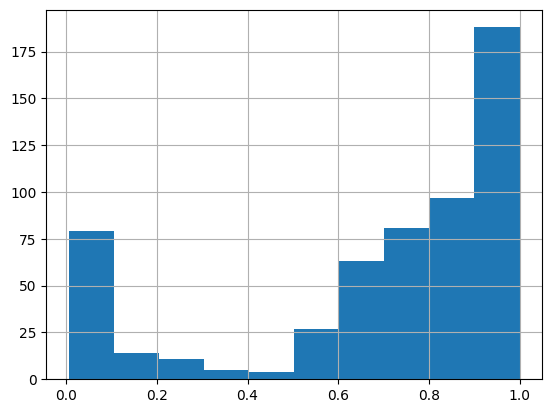

In [28]:
df_cf.loc[lambda x: x.vent==1].ps.hist();

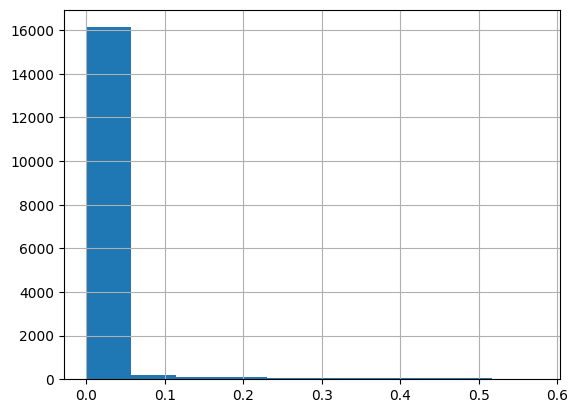

In [29]:
df_cf.loc[lambda x: x.vent==0].ps.hist();